# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [2]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
brad,♪ bluesy rock music ♪ ♪ energetic pop rock mus...,brad williams
brian,Filmed in 2020 at the Tuacahn outdoor amphithe...,brian regan
david,This is the full transcript of David Cross’ la...,david cross
doug,"Recorded live at Dante’s in Portland, Oregon W...",doug stanhope
jerry,"Jerry Seinfeld’s new hourlong comedy special, ...",jerry seinfeld
jim,Australian comedian Jim Jefferies breaks down ...,jim jefferies
kenny,Make some noise for Kenny Sebastian. Oh my God...,kenny sebastian
kevin,"Streaming on Netflix from November 17, 2020 ...",kevin hart
nikki,A NETFLIX ORIGINAL COMEDY SPECIAL Thank you! T...,nikki glaser
ray,It’s been 23 years since I did a comedy specia...,ray romano


In [3]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
brad,♪ bluesy rock music ♪ ♪ energetic pop rock mus...,brad williams,0.093029,0.517609
brian,Filmed in 2020 at the Tuacahn outdoor amphithe...,brian regan,0.109295,0.474255
david,This is the full transcript of David Cross’ la...,david cross,0.069028,0.504934
doug,"Recorded live at Dante’s in Portland, Oregon W...",doug stanhope,-0.002644,0.530453
jerry,"Jerry Seinfeld’s new hourlong comedy special, ...",jerry seinfeld,0.098991,0.477569
jim,Australian comedian Jim Jefferies breaks down ...,jim jefferies,-0.004478,0.530056
kenny,Make some noise for Kenny Sebastian. Oh my God...,kenny sebastian,0.134622,0.574216
kevin,"Streaming on Netflix from November 17, 2020 ...",kevin hart,0.051901,0.512096
nikki,A NETFLIX ORIGINAL COMEDY SPECIAL Thank you! T...,nikki glaser,0.109979,0.546167
ray,It’s been 23 years since I did a comedy specia...,ray romano,0.115617,0.499793


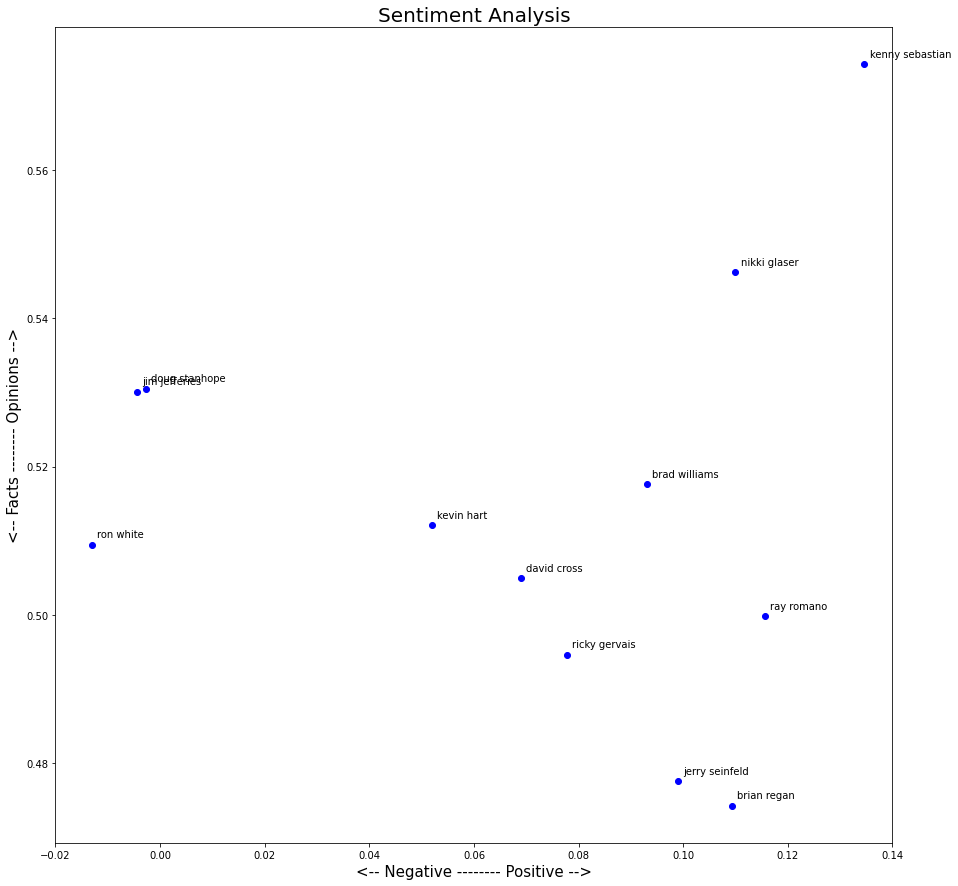

In [25]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 15]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.02 ,.14) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)
import os
folder_name = "results"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Save the plot in the "results" folder
fig = plt.gcf()  # Get the current figure
fig.set_facecolor('white')
file_name = "sentiment_analysis.png"  # Specify the desired file name and extension
file_path = os.path.join(folder_name, file_name)
plt.savefig(file_path)

plt.show()

## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [5]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [6]:
# Let's take a look at our data again
data

,transcript,full_name,polarity,subjectivity
brad,♪ bluesy rock music ♪ ♪ energetic pop rock mus...,brad williams,0.093029,0.517609
brian,Filmed in 2020 at the Tuacahn outdoor amphithe...,brian regan,0.109295,0.474255
david,This is the full transcript of David Cross’ la...,david cross,0.069028,0.504934
doug,"Recorded live at Dante’s in Portland, Oregon W...",doug stanhope,-0.002644,0.530453
jerry,"Jerry Seinfeld’s new hourlong comedy special, ...",jerry seinfeld,0.098991,0.477569
jim,Australian comedian Jim Jefferies breaks down ...,jim jefferies,-0.004478,0.530056
kenny,Make some noise for Kenny Sebastian. Oh my God...,kenny sebastian,0.134622,0.574216
kevin,"Streaming on Netflix from November 17, 2020 ...",kevin hart,0.051901,0.512096
nikki,A NETFLIX ORIGINAL COMEDY SPECIAL Thank you! T...,nikki glaser,0.109979,0.546167
ray,It’s been 23 years since I did a comedy specia...,ray romano,0.115617,0.499793


In [7]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['♪ bluesy rock music ♪ ♪ energetic pop rock music ♪ – Southern California, are you ready to have a good time tonight? (audience cheering) Get excited, make it loud, for Brad Williams! ♪ hard rock music ♪ (audience cheering) – What’s up!? (audience cheering) What’s goin’ on everybody!? (laughing) There’s no way I can live up to that, but dammit, I’m gonna try! (audience laughing) Are you guys ready to party? Are you guys ready to have a lot of fuckin’ fun tonight? Good! Good! I like havin’ fun, I like to party. I don’t know about you, but when I party, I like to drink. One of the main reasons I like to drink is because I never have to pay for it. Ever. ‘Cause everyone wants to know what happens when a dwarf gets drunk. Right now you’re thinking, “I wonder what happens. “I would really like to know that.” And I know it’s like me and hot chicks, me and hot chicks have that thing in common where we walk into the club and everyone just looks at us and goes, “We’re gettin’ that fucked up t

In [8]:
# The list has 12 elements, one for each transcript
len(list_pieces)

12

In [9]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [10]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.0683798482035294,
  0.032369534817988425,
  0.13538242730720604,
  0.040793463611859836,
  0.007572955631208057,
  0.14678736772486775,
  0.1017373511904762,
  0.16910519763460935,
  0.05088383838383838,
  0.16254758251593693],
 [0.08684063852813853,
  0.046629901960784315,
  0.13791393791393788,
  0.018258281573498958,
  -0.02287851037851038,
  0.1880991032776747,
  0.23170542635658908,
  0.04129818594104309,
  0.12031531531531531,
  0.22427161699459874],
 [0.05579985119047618,
  0.11968037074465737,
  0.05731934001670845,
  0.0758440806878307,
  0.12792896923620933,
  0.019530423280423283,
  0.0017846905346905382,
  0.07618644427467956,
  0.10248386936723992,
  0.02134096848273678],
 [0.09681219864146695,
  0.04050847300847304,
  -0.08235812133072408,
  0.023442125914036032,
  -0.06851516978099254,
  -0.036455211455211446,
  0.0050674213174213,
  -0.0731699301926055,
  -0.01885825675299362,
  0.061684834576400824],
 [0.15453629703629704,
  0.21811655339881153,
  0.058834293186971

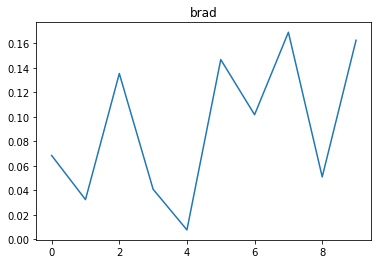

In [11]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

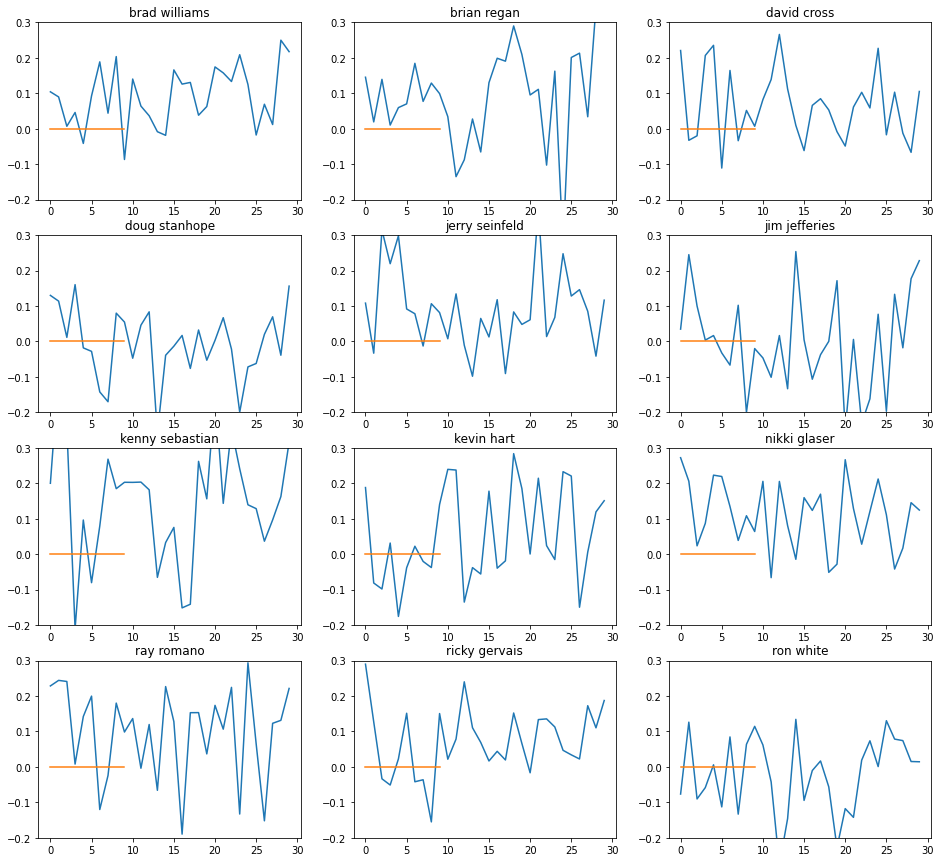

In [24]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 15]

for index, comedian in enumerate(data.index):    
    plt.subplot(4, 3, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
file_name = "sentiment_analysis_over_time.png"  # Specify the desired file name and extension
fig = plt.gcf()  # Get the current figure
fig.set_facecolor('white')
file_path = os.path.join(folder_name, file_name)
plt.savefig(file_path)
    
plt.show()

### Assignments:
1. Classify all comedian accordig to Polarity and Subjectivity.
2. Modify the number of sections the comedy routine is split into and see how the charts over time change and again classify all comedian accordig to Polarity and Subjectivity.


Here are a few possible categories that we can use for such a classification:

Positive: Comedians who tend to have a generally positive, upbeat tone in their comedy routines, with little to no negativity or sarcasm. This might include comedians who focus on "clean" or family-friendly humor, or who specialize in feel-good comedy.

Neutral: Comedians who have a relatively neutral tone in their comedy routines, with a mix of positive and negative elements. This might include comedians who use a lot of observational humor, or who tell stories that have both funny and serious elements.

Negative: Comedians who tend to have a more negative or cynical tone in their comedy routines, with a lot of sarcasm or biting humor. This might include comedians who specialize in political or social commentary, or who use a lot of profanity or edgy material.

Subjective: Comedians who have a very personal or subjective style of comedy, with a lot of personal anecdotes or opinions. This might include comedians who use a lot of self-deprecating humor, or who share personal stories about their own lives.
  
As now we have decided the categories for classification, we should consider the threshold value of polarity and subjectivity for such type of classification:
As polairy varies between -1 and 1, therefore we will keep 0 as neutral tone and -1 for highly negative and +1 for highly positive.
As subjectivty varies bewteen 0 and 1, therefor we will keep 0.5  for normal behaviour which consist of both opinios and facts as well and 0 for highly fact things and 1 for highly subjective things.


1. brad williams-Mostly Positive
2. brian regan-Mostly Positive with somewhat less in middle
3. david cross-Somewhat positive but consistent
4. doug stanhope-Negative
5. jerry seinfeld-Mostly positive
and so on ....


In [13]:
list_pieces = []
for t in data.transcript:
    split = split_text(t,45)
    list_pieces.append(split)
    
list_pieces

[['♪ bluesy rock music ♪ ♪ energetic pop rock music ♪ – Southern California, are you ready to have a good time tonight? (audience cheering) Get excited, make it loud, for Brad Williams! ♪ hard rock music ♪ (audience cheering) – What’s up!? (audience cheering) What’s goin’ on everybody!? (laughing) There’s no way I can live up to that, but dammit, I’m gonna try! (audience laughing) Are you guys ready to party? Are you guys ready to have a lot of fuckin’ fun tonight? Good! Good! I like havin’ fun, I like to party. I don’t know about you, but when I party, I like to drink. One of the main reasons I like to drink is because I never have to pay for it. Ever. ‘Cause everyone wants to know what happens when a dwarf gets drunk. Right now you’re thinking, “I wonder what happens. “I would really like to know that.” And I know it’s like me and hot chicks, me and hot chicks have that thing in common where we walk into the club and everyone just looks at us and goes, “We’re gettin’ that fucked up t

In [14]:
len(list_pieces)

12

In [15]:
len(list_pieces[0])

45

In [16]:
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    

polarity_transcript

[[0.12301011103094439,
  0.03795572916666666,
  0.11580687830687832,
  0.11309523809523811,
  -0.0005230880230879916,
  0.0029800556586270883,
  -0.007819794584500472,
  0.046853741496598635,
  0.04754464285714286,
  0.27106481481481487,
  -0.006937602627257775,
  0.11825396825396825,
  0.2269480519480519,
  0.018479437229437234,
  -0.07008928571428574,
  0.019047619047619042,
  0.20982142857142858,
  0.06180272108843537,
  -0.02479538690476191,
  0.10537918871252205,
  0.035429606625258805,
  -0.03631553631553631,
  0.14748677248677247,
  0.16618589743589743,
  0.1261904761904762,
  0.10901124338624339,
  0.14248768472906406,
  0.19702380952380955,
  -0.156140350877193,
  0.2074175824175824,
  0.20436958874458871,
  0.14821428571428572,
  0.12937925170068024,
  0.14615800865800868,
  0.14621735791090631,
  0.22561766735679778,
  0.1864583333333333,
  0.03567001180637544,
  -0.048214285714285716,
  0.17946428571428572,
  0.012936507936507947,
  -0.027666369578134287,
  0.40178571428571

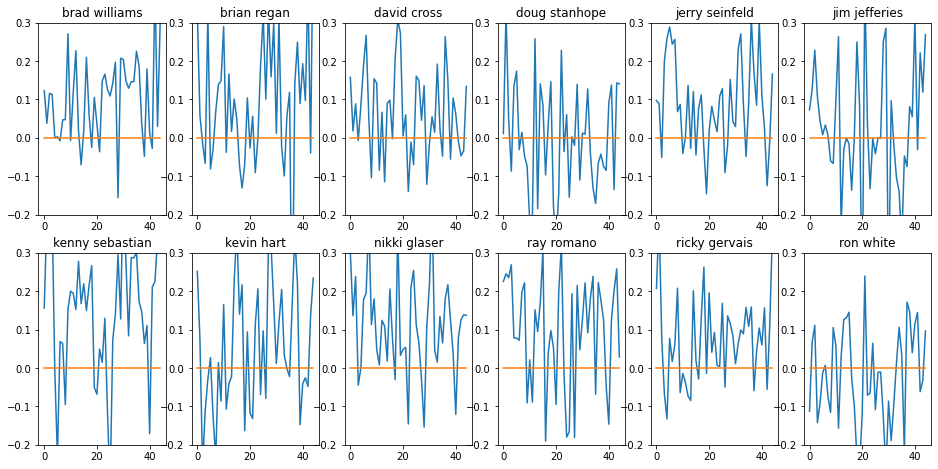

In [17]:
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 6, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,45), np.zeros(45))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

In [18]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.subjectivity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.5707671957671957,
  0.6168333333333333,
  0.5656084656084656,
  0.6172619047619048,
  0.4757482660708468,
  0.3341759431045145,
  0.46405228758169936,
  0.4740057561486133,
  0.4725446428571428,
  0.47546296296296287,
  0.4483579638752053,
  0.39852092352092355,
  0.4667207792207792,
  0.5145652958152959,
  0.5783008658008658,
  0.5457142857142857,
  0.536904761904762,
  0.43523809523809526,
  0.5446056547619047,
  0.2800705467372134,
  0.4232919254658386,
  0.511904761904762,
  0.5700176366843035,
  0.48205128205128206,
  0.5880731922398589,
  0.6200066137566138,
  0.5358784893267652,
  0.4470238095238096,
  0.642982456140351,
  0.6311355311355309,
  0.6569264069264069,
  0.5904112554112555,
  0.5671768707482994,
  0.5912337662337663,
  0.4826420890937021,
  0.5414630779848172,
  0.4090277777777778,
  0.5332251082251082,
  0.3008241758241758,
  0.5988095238095238,
  0.4834920634920635,
  0.5184640522875817,
  0.6321428571428571,
  0.44496947496947487,
  0.6571860410830999],
 [0.55

In [19]:
list_pieces = []
for t in data.transcript:
    split = split_text(t,30)
    list_pieces.append(split)
    
list_pieces

[['♪ bluesy rock music ♪ ♪ energetic pop rock music ♪ – Southern California, are you ready to have a good time tonight? (audience cheering) Get excited, make it loud, for Brad Williams! ♪ hard rock music ♪ (audience cheering) – What’s up!? (audience cheering) What’s goin’ on everybody!? (laughing) There’s no way I can live up to that, but dammit, I’m gonna try! (audience laughing) Are you guys ready to party? Are you guys ready to have a lot of fuckin’ fun tonight? Good! Good! I like havin’ fun, I like to party. I don’t know about you, but when I party, I like to drink. One of the main reasons I like to drink is because I never have to pay for it. Ever. ‘Cause everyone wants to know what happens when a dwarf gets drunk. Right now you’re thinking, “I wonder what happens. “I would really like to know that.” And I know it’s like me and hot chicks, me and hot chicks have that thing in common where we walk into the club and everyone just looks at us and goes, “We’re gettin’ that fucked up t

In [20]:
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    

polarity_transcript

[[0.10423135891885894,
  0.08977572278911565,
  0.007035147392290264,
  0.04590806019377448,
  -0.041345101258894366,
  0.09271978021978021,
  0.18865646258503396,
  0.043941798941798935,
  0.20357142857142854,
  -0.08667929292929294,
  0.14022366522366522,
  0.06392857142857142,
  0.036641749723145066,
  -0.008301331285202263,
  -0.01855998407722545,
  0.16603422619047623,
  0.12594954648526077,
  0.13065706902916208,
  0.03814699792960664,
  0.06269841269841268,
  0.17444985569985566,
  0.1575778388278388,
  0.13328924162257494,
  0.20883234126984124,
  0.12488095238095237,
  -0.017625231910946206,
  0.06914682539682543,
  0.01190084070518853,
  0.24985119047619045,
  0.2174846681096681],
 [0.14533333333333337,
  0.019345238095238092,
  0.13933982683982682,
  0.010416666666666666,
  0.059635416666666656,
  0.07023809523809524,
  0.18455026455026455,
  0.07720779220779218,
  0.12887291280148422,
  0.09913690476190476,
  0.03418367346938776,
  -0.1351190476190476,
  -0.0875220458553792

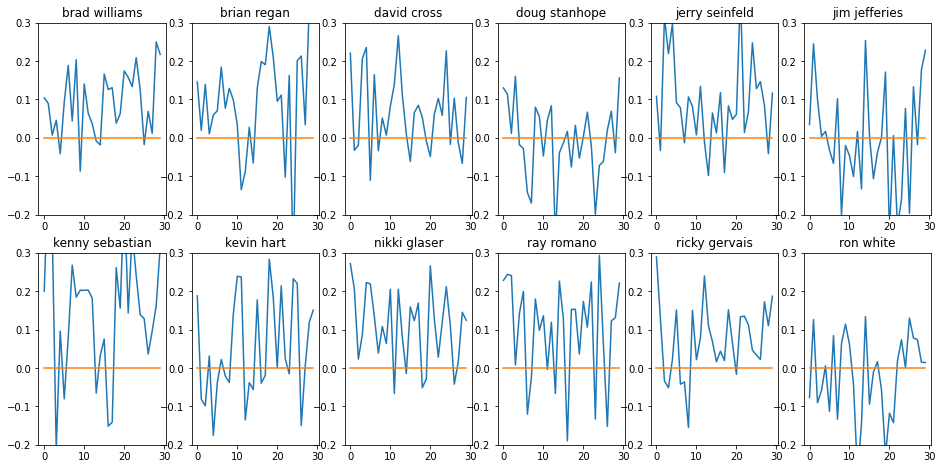

In [21]:
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 6, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,30), np.zeros(30))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

**Conclusion:**

On changing the value of N, we observed that we can classify or observe the changes that occur more closely and minutely and hence we can classify the comedians on the better scale.

By doing so, there are some changes in the corresponding graphs of the respective comedians and hence our level of classification will differentiate because the mean of the previous observations is different and that of the new observations is different again. Hence, the Comedians which were classified to be positive (highly) previously, can now be classified as moderately positive because the observations here are on the basis of closed and more accurately measured values.

In sentiment analysis, splitting a text into smaller pieces and analyzing the polarity of each piece separately can sometimes improve the accuracy of the overall sentiment score. The value of the split parameter determines the size of the pieces that the text is divided into.

Increasing the value of the split parameter will typically result in smaller pieces of text, which may lead to more nuanced or granular polarity scores. However, it's important to keep in mind that splitting the text into very small pieces may also introduce more noise or variability in the polarity scores, particularly if the text contains a lot of complex or ambiguous language.
